In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('./data/ex1data2.txt',names=['Size','Bedromms','Price'])
data.head()

,Size,Bedromms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


特征归一化

In [40]:
def normalizeFeatures(data):
    return (data-data.mean())/data.std()

In [41]:
data = normalizeFeatures(data)
data.head()

,Size,Bedromms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [42]:
data.insert(0,'Ones',1)
data.head()

,Ones,Size,Bedromms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [43]:
X,y = data.iloc[:,0:-1],data.iloc[:,-1]
X.shape,y.shape


((47, 3), (47,))

In [44]:
X = X.values
y = y.values.reshape(-1,1)

In [45]:
X.shape,y.shape

((47, 3), (47, 1))

In [46]:
def costFunction(X,y,theta):
    inner = np.power(X @ theta - y,2)
    return np.sum(inner)/(2*len(X))

In [47]:
theta = np.zeros((3,1))

In [48]:
cost_init = costFunction(X,y,theta)
cost_init

0.48936170212765967

In [63]:
def gradientDencent(X,y,theta,alpha,iters,isPrint = False):
    costs = []
    for i in range(iters):
        theta = theta - (X.T @ (X @ theta - y))*alpha/len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if isPrint == True:
            if i % 100 ==0:
                print(cost)
    return theta,costs

In [65]:
# alpha,iters = 0.01,1000

In [66]:
# theta,costs = gradientDencent(X,y,theta,alpha,iters)

在不同的学习度下的表现

In [83]:
alphas = [0.001,0.003,0.01,0.03,0.0001,0.0003]
iters = 1000

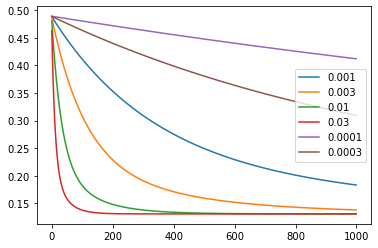

In [84]:
fig,ax = plt.subplots()
for alpha in alphas:
    _,costs = gradientDencent(X,y,theta,alpha,iters)
    plt.plot(np.arange(iters),costs,label = alpha)
    plt.legend()
    

D:\ProgramData\Anaconda3\envs\Data_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\envs\Data_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\envs\Data_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

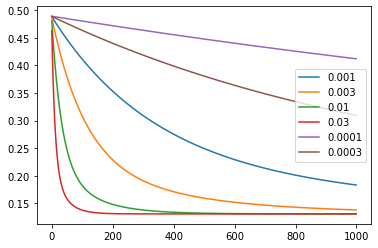

In [97]:
for alpha in alphas:
    _,costs = gradientDencent(X,y,theta,alpha,iters)
    sns.lineplot(np.arange(iters),costs,label = alpha)
